In [2]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("Reviews.csv")
data.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [4]:
data.shape

(568454, 10)

##### in our problem statment we need text summary and rating columns for sentiment analysis process 

In [5]:
data.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'],axis = 1,inplace=True)

In [6]:
# Renam the Score column 
data.rename(columns={'Score' : 'Rating','Text': 'Review'},inplace=True)

In [7]:
data['Review'] = data['Summary'] + " "+ data['Review']

In [8]:
data.drop('Summary',axis=1,inplace = True)

In [9]:
def Sentiment(label):
    if label > 3:
        return 'Positive'
    elif label < 3:
        return 'Negative'
    else:
        return 'Neutral'

In [10]:
data['Sentiment'] = data['Rating'].apply(Sentiment)

In [11]:
data.head()

,Rating,Review,Sentiment
0,5,Good Quality Dog Food I have bought several of...,Positive
1,1,Not as Advertised Product arrived labeled as J...,Negative
2,4,"""Delight"" says it all This is a confection tha...",Positive
3,2,Cough Medicine If you are looking for the secr...,Negative
4,5,Great taffy Great taffy at a great price. The...,Positive


In [12]:
data.describe()

,Rating
count,568454.000000
mean,4.183199
std,1.310436
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [13]:
data.isnull().sum()

Rating        0
Review       27
Sentiment     0
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape[0]

568427

In [16]:
data.dtypes

Rating        int64
Review       object
Sentiment    object
dtype: object

In [17]:
data.columns

Index(['Rating', 'Review', 'Sentiment'], dtype='object')

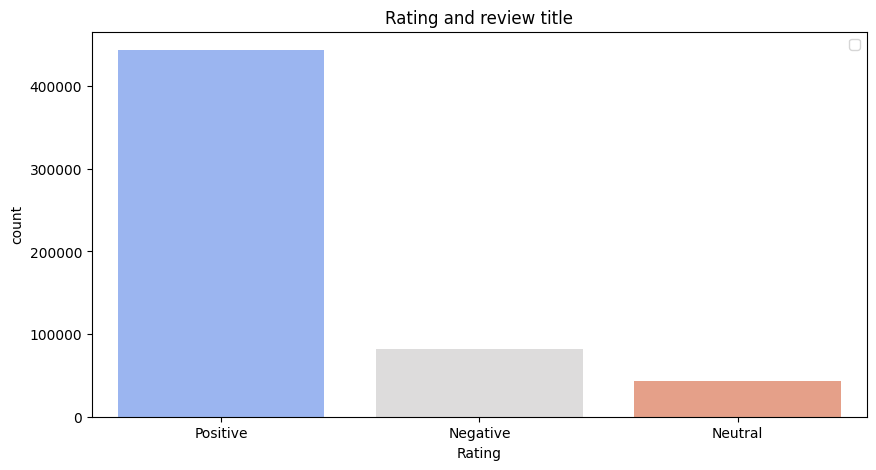

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x= data['Sentiment'], palette='coolwarm')
plt.title("Rating and review title")
plt.xlabel("Rating")
plt.legend()
plt.show()

In [19]:
round(data['Rating'].value_counts()/len(data),2)*100

Rating
5    64.0
4    14.0
1     9.0
3     8.0
2     5.0
Name: count, dtype: float64

In [20]:
round(data['Sentiment'].value_counts()/len(data),2)*100

Sentiment
Positive    78.0
Negative    14.0
Neutral      8.0
Name: count, dtype: float64

In [21]:
text_len = data['Review'].groupby(pd.cut(data['Review'].str.len(), np.arange(0,20000+500,500))).count().rename_axis(['Range']).reset_index()
text_len

,Range,Review
0,"(0, 500]",402175
1,"(500, 1000]",119927
2,"(1000, 1500]",29045
3,"(1500, 2000]",9638
4,"(2000, 2500]",3720
5,"(2500, 3000]",1666
6,"(3000, 3500]",972
7,"(3500, 4000]",377
8,"(4000, 4500]",290
9,"(4500, 5000]",313


In [22]:
df = text_len[text_len['Review'] >50]

In [23]:
df

,Range,Review
0,"(0, 500]",402175
1,"(500, 1000]",119927
2,"(1000, 1500]",29045
3,"(1500, 2000]",9638
4,"(2000, 2500]",3720
5,"(2500, 3000]",1666
6,"(3000, 3500]",972
7,"(3500, 4000]",377
8,"(4000, 4500]",290
9,"(4500, 5000]",313


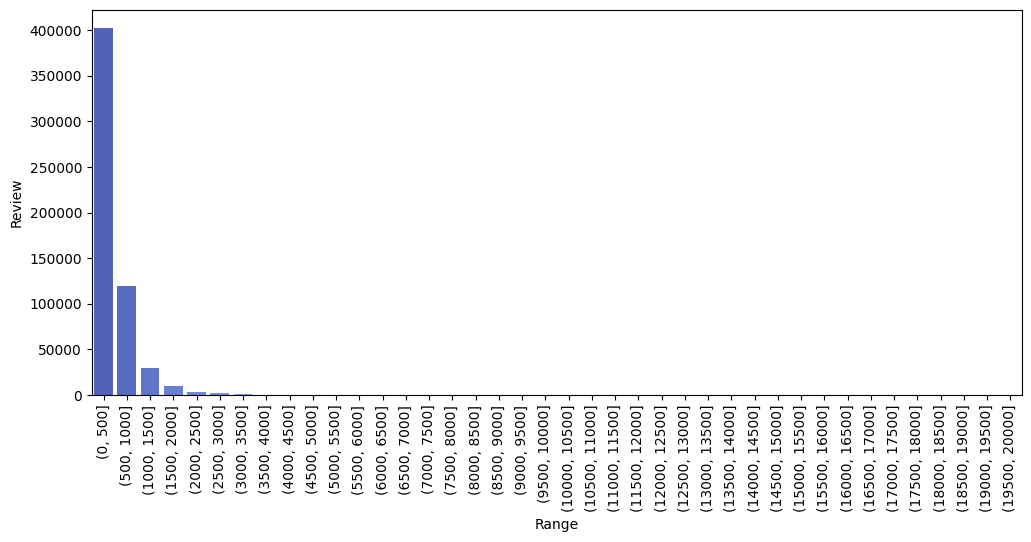

In [24]:
plt.figure(figsize=(12,5))
sns.barplot(x = df['Range'][:10], y = df['Review'][:10] ,palette='coolwarm')
plt.xticks(rotation =90)
plt.show()

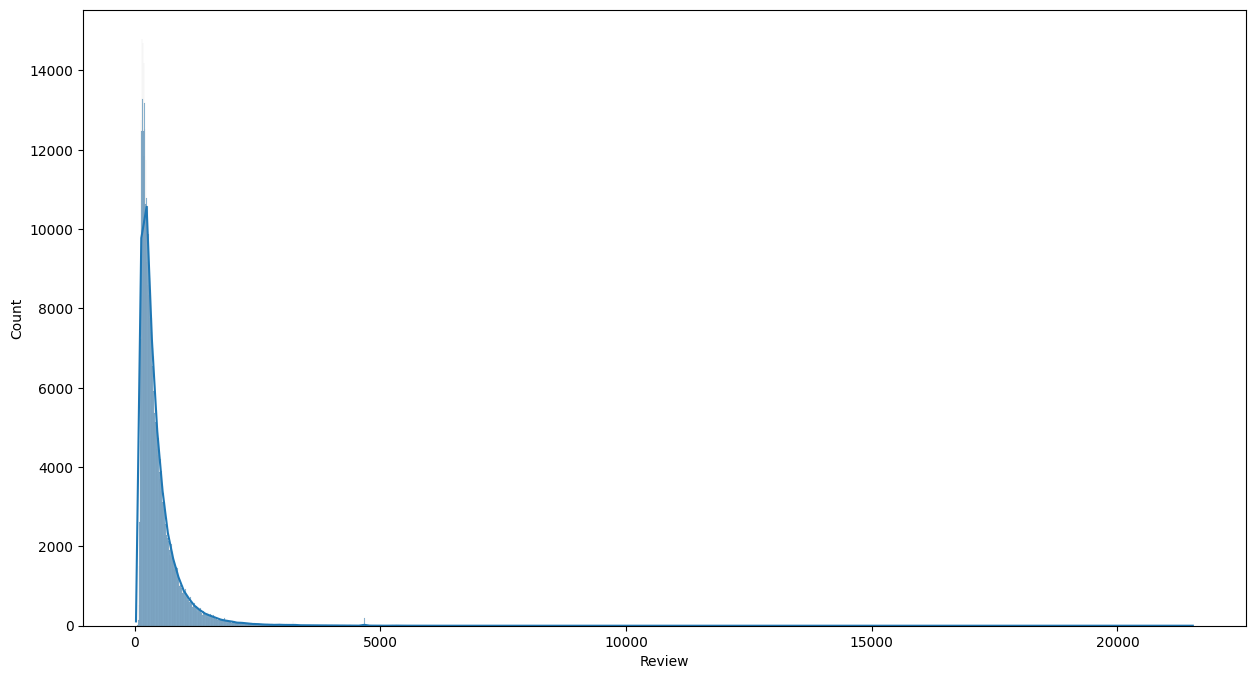

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(x = data['Review'].str.len(),palette='coolwarm',kde=True)
plt.show()

#### cleaning data 

In [44]:
nltk.data.path.append(r"c:\\Users\\rahul\\MachineLearningProject\\ml projects\\amazon_sentiment\\amazon_sentiment\\venv\\nltk_data")  # Replace with your actual path

In [45]:
! pip install nltk


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import nltk
nltk.download('punkt')  # For word tokenization
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')  # For WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [49]:
import re

from nltk.tokenize import RegexpTokenizer

def text_preprocess(text):
    # make text lower case, remove punctuation, links,square brackets,and word containg numbers 
    text = str(text)
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+|\[.*?\]|[^a-zA-Z\s]+|\w*\d\w*', ' ', text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filter_words = [word for word in words if word not in stop_words]
    text = ' '.join(filter_words)

    # tokenize word 
    # token  = word_tokenize(text)
    token = RegexpTokenizer(r'\w+').tokenize(text)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in token]

    return ' '.join(text)

In [50]:
text_preprocess(data['Review'][2100])

'best cracker ever thing addicting low calorie fat love wasabi flavor'

In [51]:
data['Review'] = data['Review'].apply(text_preprocess)
data.head()



,Rating,Review,Sentiment
0,5,good quality dog food bought several vitality ...,Positive
1,1,advertised product arrived labeled jumbo salte...,Negative
2,4,delight say confection around century light pi...,Positive
3,2,cough medicine looking secret ingredient robit...,Negative
4,5,great taffy great taffy great price wide assor...,Positive


#### vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
cv = CountVectorizer()
cv.fit_transform(data['Review'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 19432314 stored elements and shape (568427, 103276)>

In [54]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [55]:
x_tfidf = tfidf.fit_transform(data['Review'])
x_tfidf.shape

(568427, 5000)

In [56]:
y = data['Sentiment']

In [57]:
x_train,x_test ,y_train,y_test =  train_test_split(x_tfidf,y,test_size=.2,random_state=42)


lr = LogisticRegression()
lr.fit(x_train,y_train)

pred  = lr.predict(x_test)

cm = confusion_matrix(y_test,pred)

[[12080   767  3454]
 [ 1929  2122  4383]
 [ 1676   976 86299]]


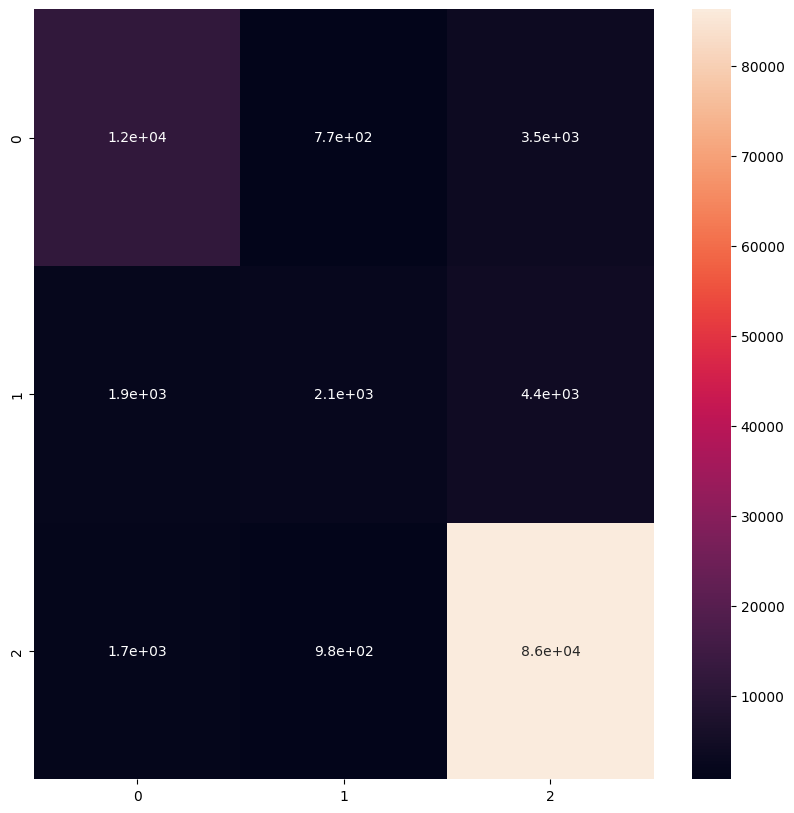

In [58]:
print(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,)
plt.show()


In [59]:
report = classification_report(y_test ,pred)
print(report)

              precision    recall  f1-score   support

    Negative       0.77      0.74      0.76     16301
     Neutral       0.55      0.25      0.35      8434
    Positive       0.92      0.97      0.94     88951

    accuracy                           0.88    113686
   macro avg       0.75      0.65      0.68    113686
weighted avg       0.87      0.88      0.87    113686



In [60]:
text = input('enter review : ')
print(text)
text = text_preprocess(text)

text_vector = tfidf.transform([text])

pred = lr.predict(text_vector)
print(pred)

this is good
['Positive']


In [61]:
data['Review'][568450]

'disappointed disappointed flavor chocolate note especially weak milk thickens flavor still disappoints worth try never buy use left gone time thanks small can'

In [62]:
import pickle
pi = {'vectorizer': tfidf, 'logreg': lr}
pickle.dump(pi,open('modle.pkl','wb'))

In [63]:
# svm = SVC(kernel='linear')
# svm.fit(x_train,y_train)
# y_pred = svm.predict(x_test)

# cm = confusion_matrix(y_test,y_pred)

# print(cm)


In [64]:
# report = classification_report(y_test,y_pred)
# print(report)